# Hitters

In [9]:
import pandas as pd
import numpy as np

In [2]:
ls

#check list/                   NLP paper/
Byte Academy/                  Portfolio/
Data Science/                  Untitled.ipynb
Hitters.csv                    information_extraction_sansan/
Jigsaw Academy/


In [41]:
hitters = pd.read_csv("Hitters.csv")
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [42]:
hitters.shape

(322, 21)

In [43]:
hitters.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [44]:
salary = hitters[['Unnamed: 0', "Salary"]]
salary.shape

(322, 2)

In [45]:
hitters.isnull().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [46]:
salary.head()

,Unnamed: 0,Salary
0,-Andy Allanson,NaN
1,-Alan Ashby,475.0
2,-Alvin Davis,480.0
3,-Andre Dawson,500.0
4,-Andres Galarraga,91.5


In [47]:
salary_null = hitters[hitters["Salary"].isnull()]
salary_null.shape

(59, 21)

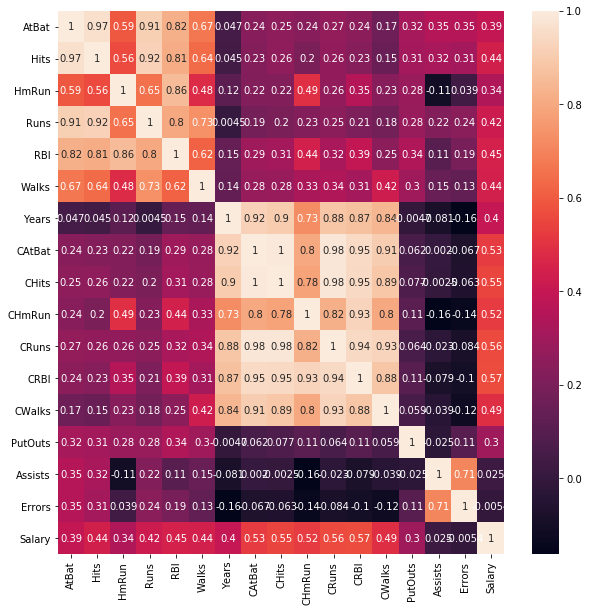

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cor = hitters.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

In [49]:
high_cor = cor[cor["Salary"] >= 0.4]

In [50]:
high_cor.index

Index(['Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun',
       'CRuns', 'CRBI', 'CWalks', 'Salary'],
      dtype='object')

In [51]:
salary_non_null = hitters[hitters["Salary"].notnull()]
salary_non_null.shape

(263, 21)

In [52]:
salary_non_null_target = salary_non_null[["Unnamed: 0", "Salary"]]
salary_non_null_target.shape

(263, 2)

In [54]:
salary_non_null.set_index('Unnamed: 0', inplace=True)
salary_non_null.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [53]:
salary_non_null_target.set_index('Unnamed: 0', inplace=True)
salary_non_null_target.head()

,Salary
Unnamed: 0,
-Alan Ashby,475.0
-Alvin Davis,480.0
-Andre Dawson,500.0
-Andres Galarraga,91.5
-Alfredo Griffin,750.0


In [55]:
salary_non_null.drop("Salary", axis=1, inplace=True) # X

In [57]:
salary_non_null.shape

(263, 19)

In [60]:
salary_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
NewLeague    263 non-null object
dtypes: int64(16), object(3)
memory usage: 41.1+ KB


In [66]:
salary_non_null["NewLeague"].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [67]:
salary_non_null["Division"].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [68]:
salary_non_null["League"].value_counts()

A    139
N    124
Name: League, dtype: int64

In [71]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
binary_nleague = lb.fit_transform(salary_non_null["NewLeague"])

In [72]:
#"Division", "League"
binary_league = lb.fit_transform(salary_non_null["League"])
binary_division = lb.fit_transform(salary_non_null["Division"])

In [74]:
salary_non_null["NewLeague"] = binary_nleague

/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
salary_non_null["League"] = binary_league
salary_non_null["Division"] = binary_division

/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [77]:
salary_non_null.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
Unnamed: 0,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(salary_non_null)
X.shape

/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(263, 19)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca.shape

(263, 3)

In [85]:
X = pd.DataFrame(X_pca)
salary_non_null_target.head()

,Salary
Unnamed: 0,
-Alan Ashby,475.0
-Alvin Davis,480.0
-Andre Dawson,500.0
-Andres Galarraga,91.5
-Alfredo Griffin,750.0


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, salary_non_null_target, test_size=0.3)

In [89]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(random_state=0)
reg = reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

In [ ]:
y_test, reg_pred

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, reg_pred)

0.45907022032678235

In [91]:
mean_squared_error(y_test, reg_pred)

74956.80238877115

In [1]:
import numpy as np

In [2]:
np.sqrt(74956)

273.78093432523747

In [ ]:
from sklearn.tree import 

In [ ]:
clf = Gridsearch